## A neural network for head direction system

To keep the egocentric head direction information, theoretical neuroscientists predict a group of neurons in the brain indicating the current head direction. With noting this neural population as head-direction neurons, each head-direction neuron has an intristic tunned direction, which means this neuron will be activited when the animal is heading closely to its tunned direction (see in figure A: Capture.png).

<img src='https://github.com/MScNE-LSMLSDA/2023_ringattractor-saruman18/blob/main/Capture.PNG?raw=1'>

Besides, to maintain a robust representation of head direction, the head direction network is supposed to have the following properties:

1) The head direction representation is stable without external inputs.
1) The head direction network can continuously represent head direction and dynamically update its state in response to the animal's movement.

To achieve such an efficient and robust representation, a connection pattern in Figure B is proposed. A head direction neuron uniformly inhibits all other neurons; however, it strongly excites the neurons with a similar preferred tuned angle of head direction.

In this way, this network is difficult to be influenced by noise, as only the strongest activation, i.e., the bump of heading direction, can remain stable. Noise will be canceled out by the overall inhibition of all neurons.

Moreover, the network connection actually defines a dynamic system. With an initial representation of head direction neurons, the representation can be iterated based on the connection matrix. According to Lyapunov stability theory, the minimum energy points (attractors) of this system form a continuous ring, which is a continuous representation of directions (see Figure C). Therefore, given any initial representation of this network, the head direction network can always converge to one point on the ring, providing the current head direction of the animal. Additionally, the system state can move along the ring structure smoothly due to the ring attractor structure.

For more information of head direction network, read this paper: https://www.science.org/doi/full/10.1126/science.aal4835.

**In this assignment, we focus on the following question:**

**how to visualize the intrinstic ring structure of head direction neurons from time series data.**

Firstly, let's generate the time traces of neuron activities.

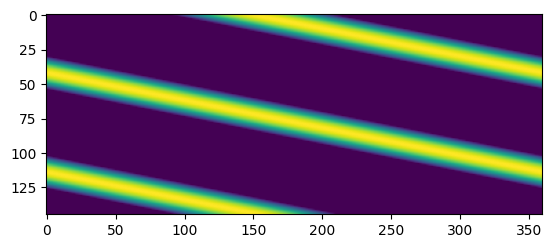

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def move(v,step):
    if step == 0 :
        return v
    new_v = np.zeros(len(v))
    new_v[step:] = v[:-step]
    new_v[:step] = v[-step:]
    return new_v

process = []
current_state = np.zeros(360)
current_state[90:210] = np.sin(np.arange(120)/120*np.pi)

for i in range(145):
    process.append(current_state[:])
    current_state = move(current_state,5)
neural_traces_120_2circle = np.array(process)
plt.imshow(neural_traces_120_2circle)

Here, let's assume we have 360 neurons, neurons with index 0,1,2,3,..,359 prefer the head direction of 0,1,2,3,...,359. The direction angles of 0, 90, 180, 270 mean forward, left, backward, right, respectively.Each neuron has a sinusoidal tuning curve with the width of 120 degrees.

In time 0, the current heading direction of the animal is 150 degree. Therefore, the neuron activation of the neuron preferred 150 is 1, the neurons preferred 120 or 180 is 0.5 etc.

From time step 1 to time step 144, the animal rotate in the counter-clockwise direction for 5 degrees each time step. After rotating for 2 circles, the animal stop moving.

**Now lets try to find the intristic ring structure of the neural population by PCA**

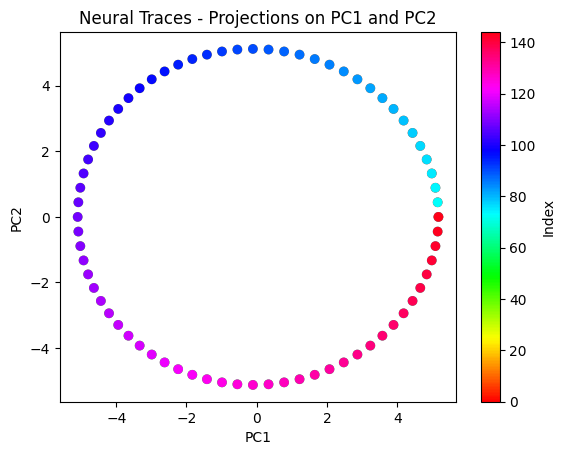

In [7]:
# You are free to use sklearn
import sklearn
from sklearn.decomposition import PCA

# plot the projections on the two first PCs to visualize the neural traces, each point represent 1 neuron.
# colormap for the preferred directions of neurons form 1 to 360
pca = PCA(n_components=2)
pca.fit(neural_traces_120_2circle)
projected_data = pca.transform(neural_traces_120_2circle)

# Create colormap based on index
colors = np.arange(projected_data.shape[0])

# Plot the projections on the first two PCs
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=colors, cmap='hsv')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Neural Traces - Projections on PC1 and PC2')
plt.colorbar(label='Index')
plt.show()

Here we can see,

**1) our 360 head direction neurons form a ring structure in the PC space.**
**2) The neurons preferred close directions are placed near to each other.**

This is caused by the connection pattern of the head direction network. The specific connection pattern makes the system state always locate in the ring attractor.

### Here are the questions:

**1) why we use the first 2 PCs for the dimensionality reduction.**
**Why neurons with similiar preferred direction are projected near to each other.**

**2) Imagine a new animal: the width of tuning curve of this animal is only 30 degree. This animal also rotates 2 circles from the 150 degree. Could you try to identify the ring structure of this animal?**
Hint: use nonlinear method if PCA cannot work well.

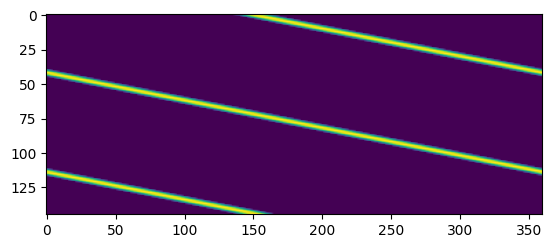

In [8]:

# We use the first to PCs for dimensionality reduction as they explain most of the variance form the data.The first PCs projects the data to the maximum variance and we keep most of the original informnation form the data. By how PCA works, the data,neurons, that have similiar activity will be clustered togther as they are being prohjected near in the new low dimensionality projection by the PCA.

import numpy as np
import matplotlib.pyplot as plt
def move(v,step):
    if step == 0 :
        return v
    new_v = np.zeros(len(v))
    new_v[step:] = v[:-step]
    new_v[:step] = v[-step:]
    return new_v

process = []
current_state = np.zeros(360)
current_state[135:165] = np.sin(np.arange(30)/30*np.pi)

for i in range(145):
    process.append(current_state[:])
    current_state = move(current_state,5)
neural_traces_30_2circle = np.array(process)
plt.imshow(neural_traces_30_2circle)

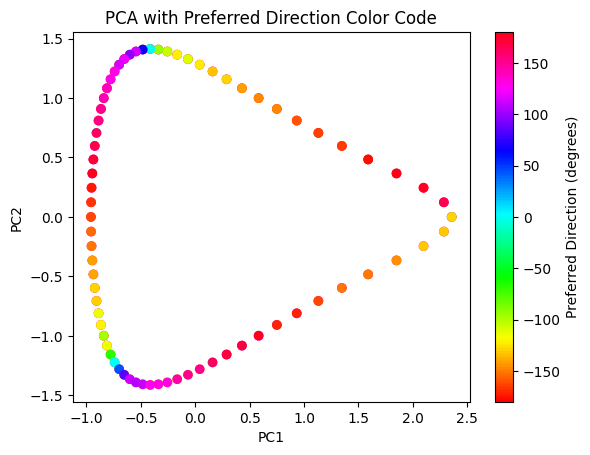

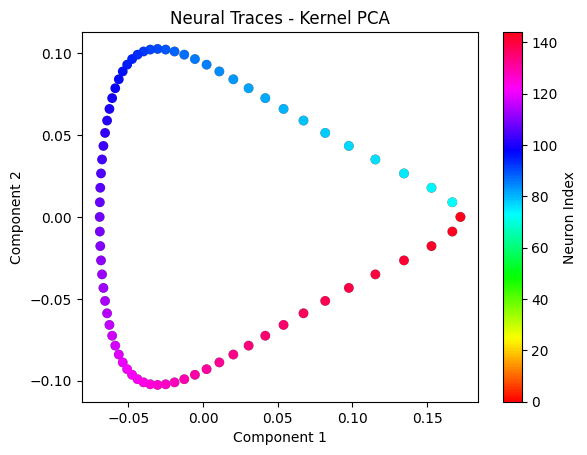

In [21]:
# plot the projections on the two first PCs to visualize the neural traces, each point represent 1 neuron.
# colormap for the preferred directions of neurons form 1 to 360
from sklearn.decomposition import KernelPCA


pca = PCA(n_components=2)
pca_projection = pca.fit_transform(neural_traces_30_2circle)

# Calculate preferred direction angles
preferred_directions = np.angle(np.fft.fft(neural_traces_30_2circle[:, 135:165]), deg=True)

# Create colormap based on preferred directions
colors = preferred_directions.flatten()

# Keep only the first 145 elements to match the dimensions of the scatter plot
colors = colors[:145]

# Plot PCA projection with color code
plt.scatter(pca_projection[:, 0], pca_projection[:, 1], c=colors, cmap='hsv')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with Preferred Direction Color Code')
plt.colorbar(label='Preferred Direction (degrees)')
plt.show()

#using kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
projected_data = kpca.fit_transform(neural_traces_30_2circle)

# Create colormap based on index
colors = np.arange(projected_data.shape[0])

# Plot the projections on the first two components
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=colors, cmap='hsv')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Neural Traces - Kernel PCA')
plt.colorbar(label='Neuron Index')
plt.show()





# What is the difference with the first plot ?
#The difference between the plots is teh diamater of the ring. Given the first one is 120 degress it has a bigger diameter.


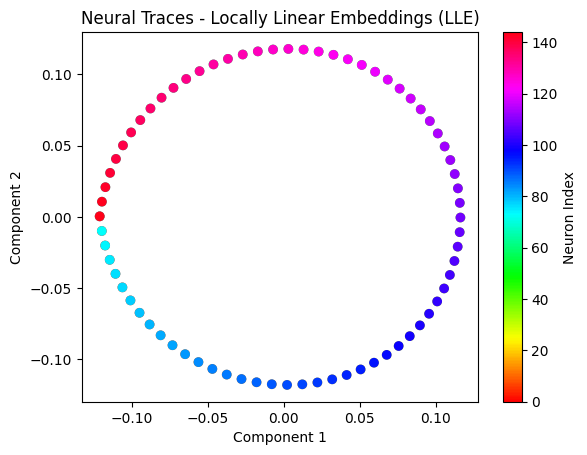

In [10]:
from sklearn.datasets import load_digits
>>> from sklearn.manifold import LocallyLinearEmbedding
# Perform Locally Linear Embeddings (LLE)
lle = LocallyLinearEmbedding(n_components=2)
projected_data = lle.fit_transform(neural_traces_30_2circle)

# Create colormap based on index
colors = np.arange(projected_data.shape[0])

# Plot the projections on the first two components
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=colors, cmap='hsv')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Neural Traces - Locally Linear Embeddings (LLE)')
plt.colorbar(label='Neuron Index')
plt.show()

**3) Go back to the first animal, this animal still rotates towards the counter clockwise direction. However, the rotating amplitute of each time step is randomlized. Could you try to identify the ring structure of this animal? Try both linear and nonlinear methods.**

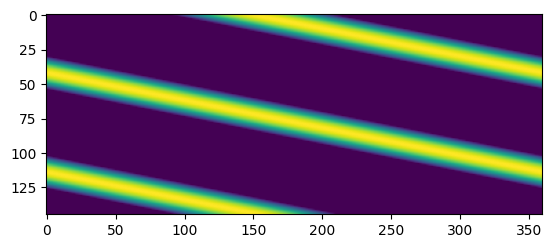

In [11]:
import numpy as np
import matplotlib.pyplot as plt
def move(v,step):
    if step == 0 :
        return v
    new_v = np.zeros(len(v))
    new_v[step:] = v[:-step]
    new_v[:step] = v[-step:]
    return new_v

process = []
current_state = np.zeros(360)
current_state[90:210] = np.sin(np.arange(120)/120*np.pi)

for i in range(145):
    process.append(current_state[:])
    current_state = move(current_state,np.abs(int(np.random.normal(0,5,1))))
neural_traces_120_random = np.array(process)
plt.imshow(neural_traces_120_2circle)

Text(0.5, 1.0, 'PCA')

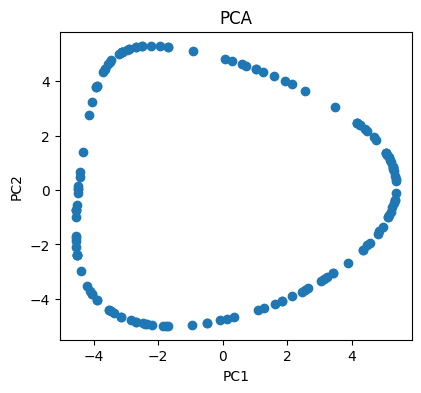

In [12]:
# linear case
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_projection = pca.fit_transform(neural_traces_120_random)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(pca_projection[:, 0], pca_projection[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')



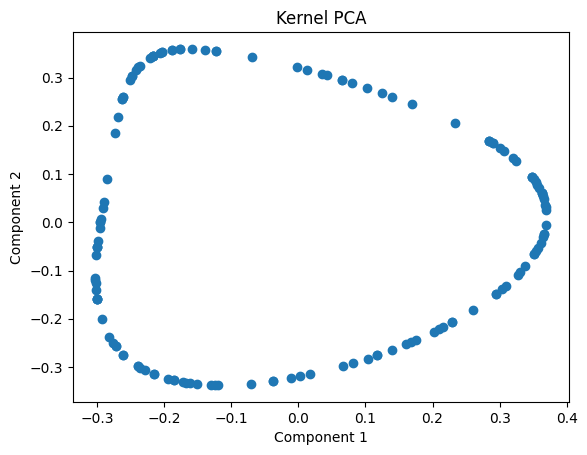

In [13]:
# Nonlinear case
# Perform kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf')
kpca_projection = kpca.fit_transform(neural_traces_120_random)

# Plot kernel PCA projection
plt.scatter(kpca_projection[:, 0], kpca_projection[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Kernel PCA')
plt.show()

**4) Explain why linear methods and nonlinear methods have different performace in question 2 and question 3**

In [ ]:
# The methods have different perfromance as the data in quesiton three is more complex then the one in question 2. Specifically, the rotations of the head have randomized amplitudes which creat relathinoships between the neuron that are nonlineal and more complex to quantify. Therefore, for the data in quesiton three ist more efgficnet to use a Kernel PCA in which we project the data to a higher dimensional space in which the lineal relathionship is easir to idnetify. Given then in question 2 the rotation is 30 degrees its easier to understand the pertformance of the lienal method then the non lienal method.